In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn

def format_pytorch_version(version):
    return version.split('+')[0]

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)
CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 14.7 M

In [ ]:
!pip install pyunlocbox

from torch_geometric.utils import to_dense_adj
from scipy import spatial
from sklearn import metrics
import torch_geometric
import sklearn
# import pygsp
import utils
import learn_graph as lg
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
class GCN_(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 64)
        self.conv3 = GCNConv(64, num_classes)

    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv3(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)

In [ ]:
edge_index_chameleon = torch.load('edge_index_chameleon.pt')
adj_chameleon = to_dense_adj(edge_index_chameleon)
n = adj_chameleon.shape[1]
print(adj_chameleon.shape)
adj_chameleon = adj_chameleon.detach().numpy().reshape(n,-1)
print(adj_chameleon.shape)
# print(adj_chameleon)
G_gt_chameleon = nx.from_numpy_array(adj_chameleon)
pos = nx.spring_layout(G_gt_chameleon)


torch.Size([1, 2277, 2277])
(2277, 2277)


In [ ]:
print(adj_chameleon[1800:1900,0:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

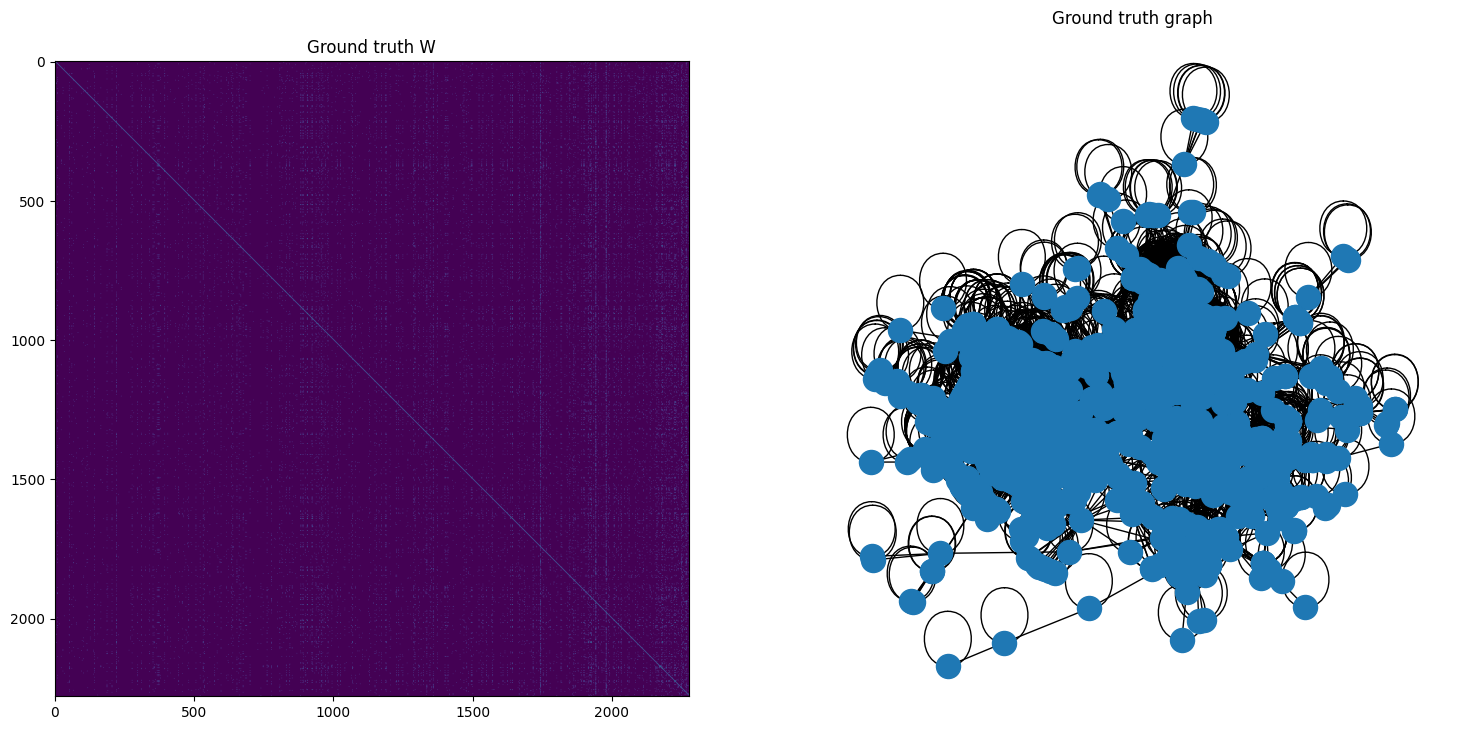

In [ ]:
plt.figure(figsize=(18, 9))

plt.subplot(1,2,1)
plt.imshow(adj_chameleon)
plt.title("Ground truth W")

plt.subplot(1,2,2)
plt.title("Ground truth graph")
nx.draw(G_gt_chameleon, pos=pos)

In [ ]:
edge_index_cornell = torch.load('edge_index_cornell.pt')
adj_cornell = to_dense_adj(edge_index_cornell)
n = adj_cornell.shape[1]
adj_cornell = adj_cornell.detach().numpy().reshape(n,-1)
print(adj_cornell.shape)
G_gt_cornell = nx.from_numpy_array(adj_cornell)
pos = nx.spring_layout(G_gt_cornell)

(183, 183)


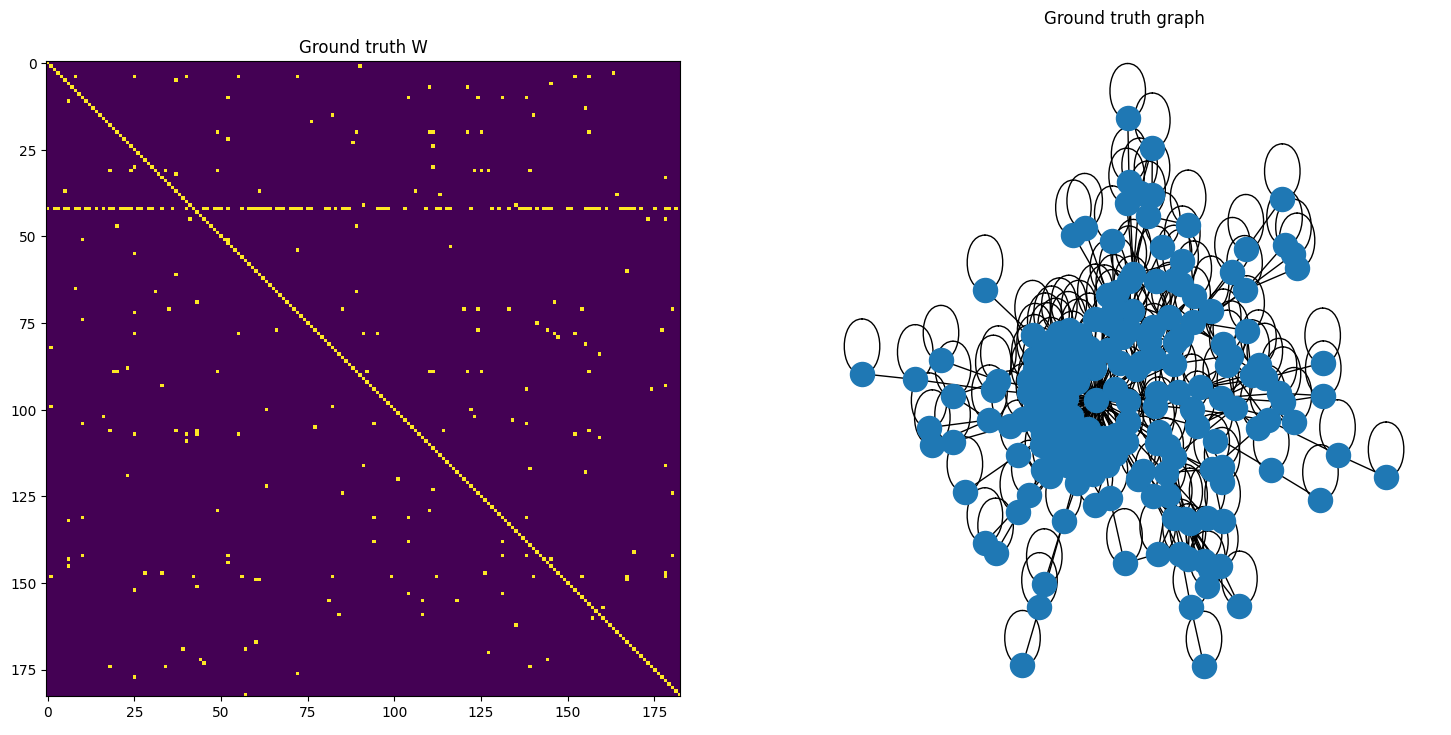

In [ ]:
plt.figure(figsize=(18, 9))

plt.subplot(1,2,1)
plt.imshow(adj_cornell)
plt.title("Ground truth W")

plt.subplot(1,2,2)
plt.title("Ground truth graph")
nx.draw(G_gt_cornell, pos=pos)

In [ ]:
edge_index_texas = torch.load('edge_index_texas.pt')
adj_texas = to_dense_adj(edge_index_texas)
n = adj_texas.shape[1]
adj_texas = adj_texas.detach().numpy().reshape(n,-1)
print(adj_texas.shape)
G_gt_texas = nx.from_numpy_array(adj_texas)
pos = nx.spring_layout(G_gt_texas)

(183, 183)


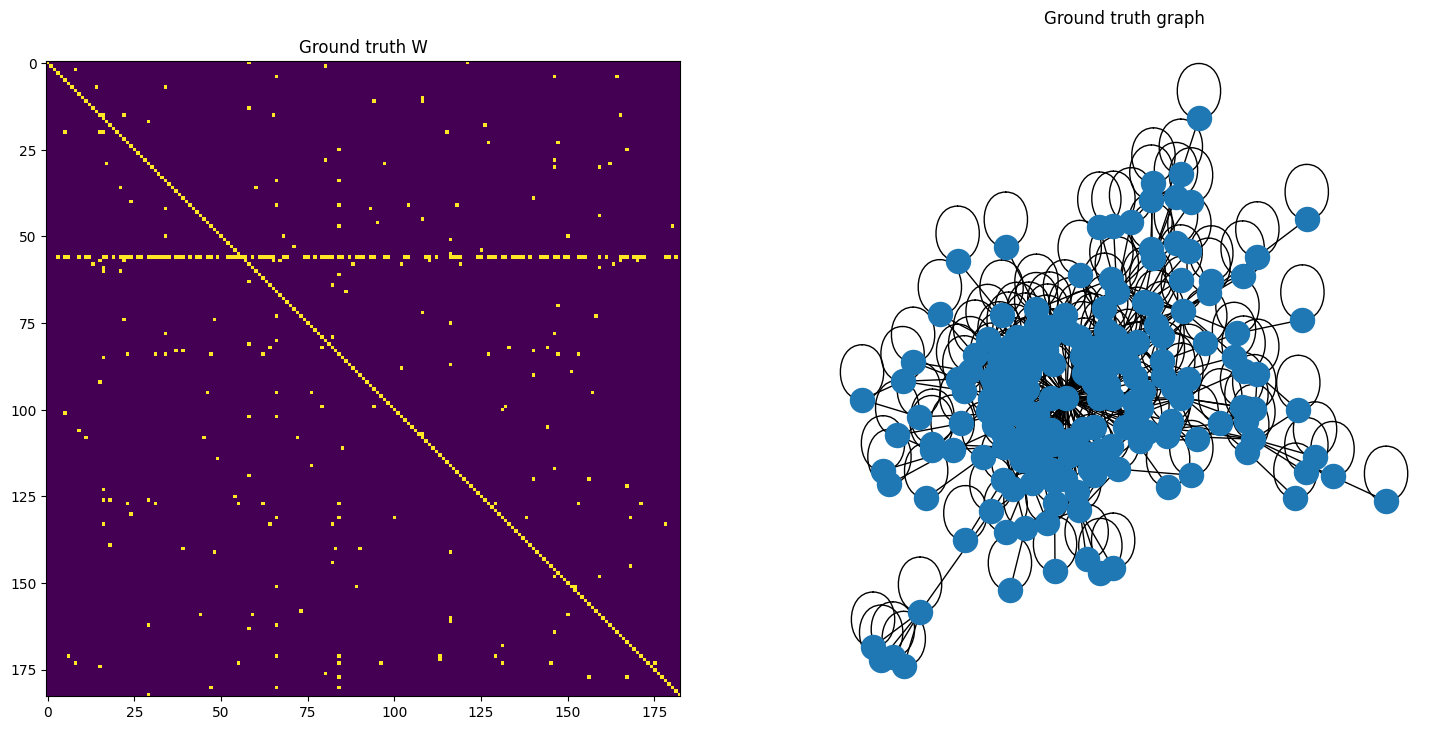

In [ ]:
plt.figure(figsize=(18, 9))

plt.subplot(1,2,1)
plt.imshow(adj_texas)
plt.title("Ground truth W")

plt.subplot(1,2,2)
plt.title("Ground truth graph")
nx.draw(G_gt_texas, pos=pos)

In [ ]:
label_chameleon = torch.load('label_chameleon.pt')
print(label_chameleon.shape)
print(label_chameleon[1801])
print(label_chameleon[1])
print(label_chameleon.argmax(0))
print(label_chameleon[3])

(2277,)
3
3
3
4


In [ ]:
label_cornell = torch.load('label_cornell.pt')
print(label_cornell.shape)
print(label_cornell)
print(label_cornell.argmax(0))
print(label_cornell[4])

(183,)
[3 0 2 3 4 3 0 0 3 0 3 3 3 3 3 4 3 3 0 3 0 3 3 3 3 1 3 3 0 2 3 3 4 3 4 4 2
 3 3 3 0 4 0 3 3 3 2 2 0 3 0 3 3 3 3 3 0 2 2 4 4 4 3 3 3 3 0 3 3 3 4 3 3 4
 4 3 0 3 0 3 4 3 2 4 2 4 3 3 0 3 3 3 0 3 3 4 3 3 3 4 0 0 4 3 3 0 4 3 2 3 3
 0 3 0 0 3 3 4 3 3 3 0 3 0 3 2 4 2 3 3 0 4 3 4 3 4 3 3 0 3 2 3 3 3 3 3 3 2
 3 4 3 4 3 3 3 3 0 2 0 2 3 3 4 3 0 3 3 2 0 3 3 4 3 2 0 3 0 4 3 3 4 3 3]
4
4


In [ ]:
label_texas = torch.load('label_texas.pt')
print(label_texas.shape)
print(label_texas)

(183,)
[3 0 2 3 4 3 0 0 3 0 3 3 3 3 3 4 3 3 0 3 0 3 3 3 3 1 3 3 0 2 3 3 4 3 4 4 2
 3 3 3 0 4 0 3 3 3 2 2 0 3 0 3 3 3 3 3 0 2 2 4 4 4 3 3 3 3 0 3 3 3 4 3 3 4
 4 3 0 3 0 3 4 3 2 4 2 4 3 3 0 3 3 3 0 3 3 4 3 3 3 4 0 0 4 3 3 0 4 3 2 3 3
 0 3 0 0 3 3 4 3 3 3 0 3 0 3 2 4 2 3 3 0 4 3 4 3 4 3 3 0 3 2 3 3 3 3 3 3 2
 3 4 3 4 3 3 3 3 0 2 0 2 3 3 4 3 0 3 3 2 0 3 3 4 3 2 0 3 0 4 3 3 4 3 3]


In [ ]:
node_feat_cameleon = torch.load('node_feat_cameleon.pt')
print(node_feat_cameleon.shape)
print(node_feat_cameleon)

torch.Size([2277, 2325])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0238, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [ ]:
print(node_feat_cameleon[1])
print(node_feat_cameleon[2])

tensor([0., 0., 0.,  ..., 0., 0., 0.])
tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [ ]:
node_feat_cornell = torch.load('node_feat_cornell.pt')
print(node_feat_cornell.shape)
print(node_feat_cornell)

torch.Size([183, 1703])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [ ]:
node_feat_texas = torch.load('node_feat_texas.pt')
print(node_feat_texas.shape)
print(node_feat_texas)

torch.Size([183, 1703])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


## Solve the optimization problem

In [ ]:
W_chameleon, problem = lg.log_degree_barrier(node_feat_cameleon, adj_chameleon, dist_type='sqeuclidean', alpha=0.5, beta=1, rtol=1e-5, step=0.5, w0=None, retall=True, verbosity='LOW')

Solution found after 295 iterations:
    objective function f(sol) = 8.416585e+03
    stopping criterion: RTOL


In [ ]:
W_thresh_chameleon = np.max(adj_chameleon) * W_chameleon / np.max(W_chameleon)
W_thresh_chameleon[W_thresh_chameleon < 0.1 * np.max(adj_chameleon)] = 0
h_idx = 0.8
W_new = adj_chameleon*(1-h_idx) + W_thresh_chameleon*(h_idx)
# print(np.max(W_thresh_chameleon))

# W_new[W_new < 0.05] = 0
G_learned_chameleon = nx.from_numpy_array(W_new)
print(G_learned_chameleon.degree)
print(nx.average_neighbor_degree(G_learned_chameleon))
print(nx.average_neighbor_degree(G_gt_chameleon))
print(G_learned_chameleon.number_of_edges())
print(G_gt_chameleon.number_of_edges())
pos = nx.spring_layout(G_gt_chameleon)

[(0, 7), (1, 48), (2, 22), (3, 3), (4, 6), (5, 17), (6, 6), (7, 5), (8, 97), (9, 12), (10, 52), (11, 3), (12, 10), (13, 11), (14, 3), (15, 13), (16, 6), (17, 20), (18, 6), (19, 3), (20, 20), (21, 8), (22, 18), (23, 5), (24, 35), (25, 14), (26, 9), (27, 30), (28, 11), (29, 6), (30, 12), (31, 8), (32, 9), (33, 26), (34, 20), (35, 7), (36, 9), (37, 15), (38, 12), (39, 9), (40, 13), (41, 16), (42, 3), (43, 20), (44, 9), (45, 76), (46, 4), (47, 12), (48, 7), (49, 12), (50, 25), (51, 12), (52, 183), (53, 54), (54, 33), (55, 18), (56, 4), (57, 20), (58, 13), (59, 35), (60, 81), (61, 15), (62, 11), (63, 4), (64, 20), (65, 35), (66, 50), (67, 10), (68, 29), (69, 13), (70, 57), (71, 6), (72, 31), (73, 6), (74, 7), (75, 16), (76, 75), (77, 22), (78, 10), (79, 15), (80, 22), (81, 4), (82, 6), (83, 12), (84, 3), (85, 5), (86, 9), (87, 10), (88, 18), (89, 64), (90, 8), (91, 13), (92, 8), (93, 4), (94, 7), (95, 10), (96, 14), (97, 14), (98, 27), (99, 69), (100, 16), (101, 15), (102, 20), (103, 20), (

In [ ]:
print(W_new[0:4,0:4])
print(W_new[1801])

[[0.2 0.  0.  0. ]
 [0.  0.2 0.  0. ]
 [0.  0.  0.2 0. ]
 [0.  0.  0.  0.2]]
[0. 0. 0. ... 0. 0. 0.]


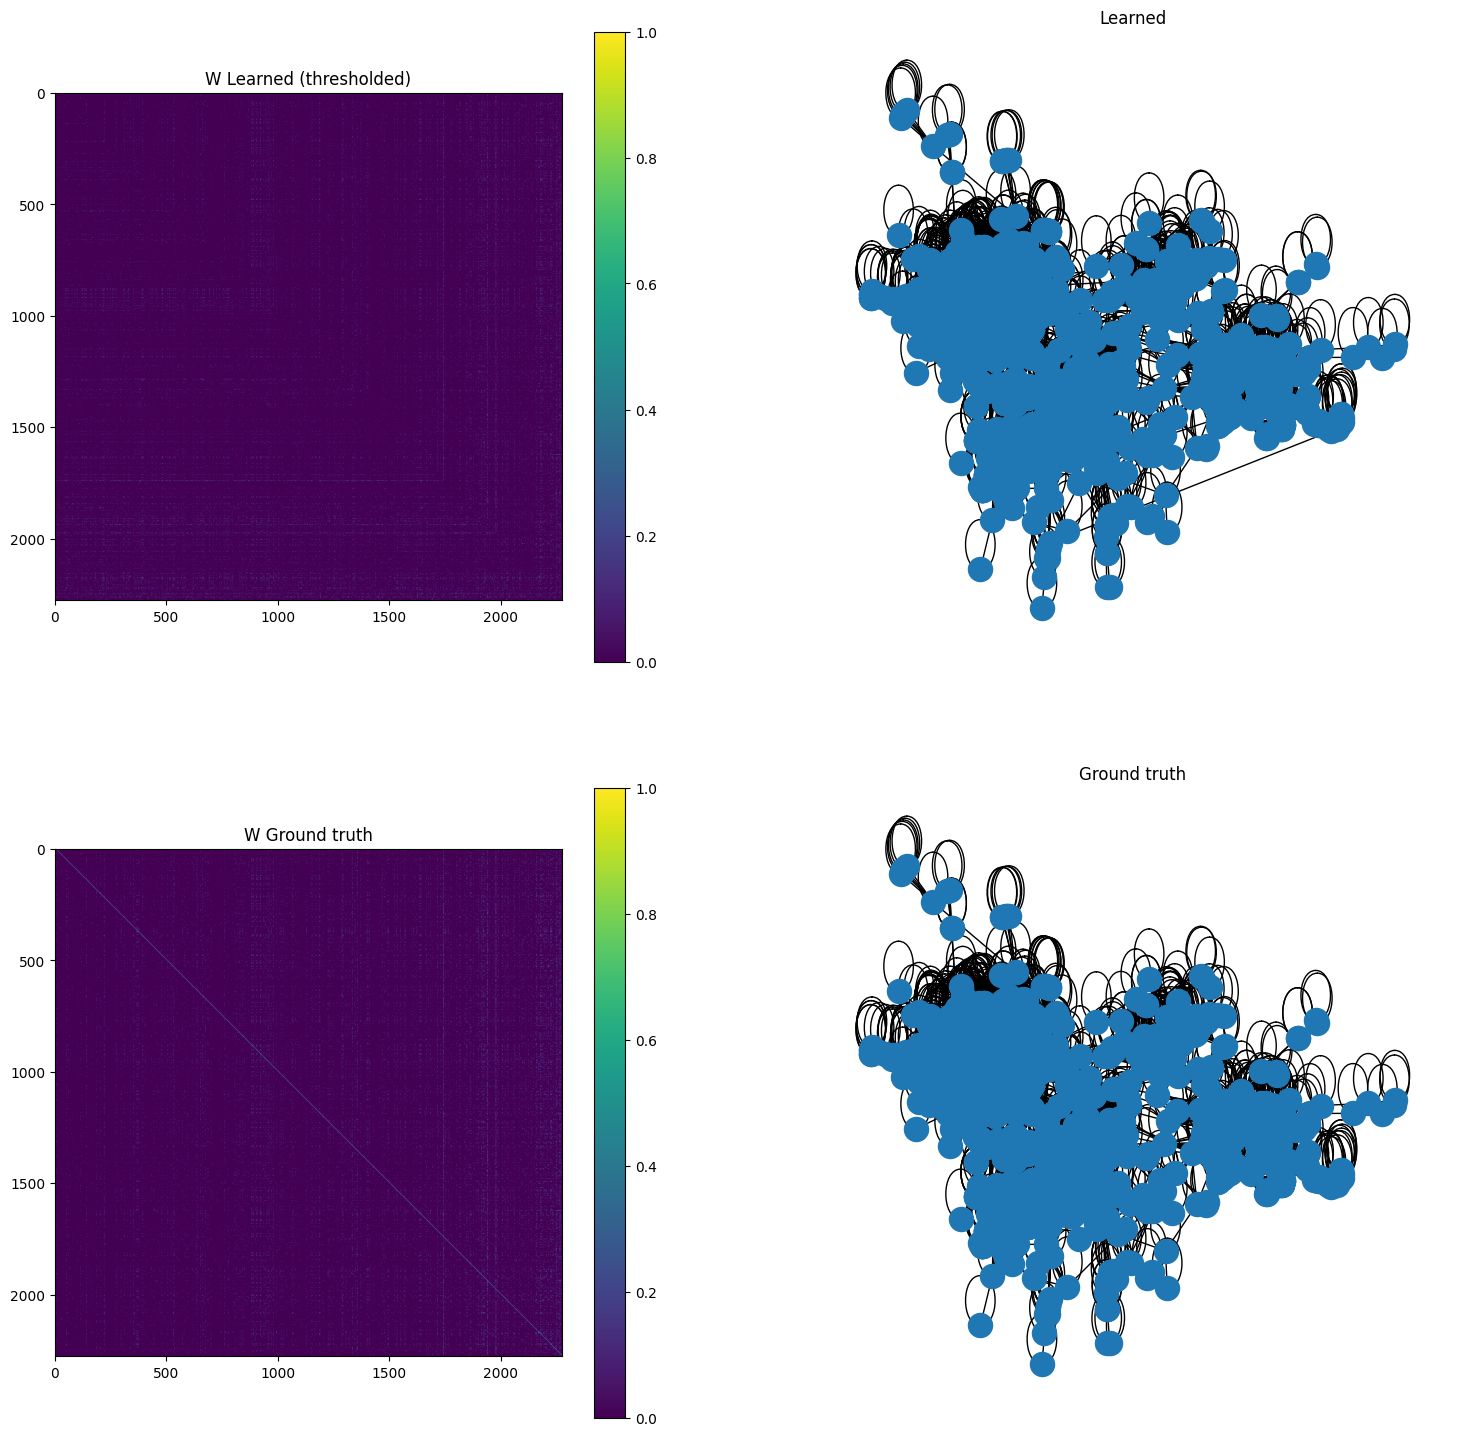

In [ ]:
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.imshow(W_thresh_chameleon)
plt.colorbar()
plt.title('W Learned (thresholded)')

plt.subplot(2,2,2)
nx.draw(G_learned_chameleon, pos=pos)
plt.title('Learned')

plt.subplot(2,2,3)
plt.imshow(adj_chameleon)
plt.colorbar()
plt.title('W Ground truth')

plt.subplot(2,2,4)
nx.draw(G_gt_chameleon, pos=pos)
plt.title('Ground truth')

plt.show()

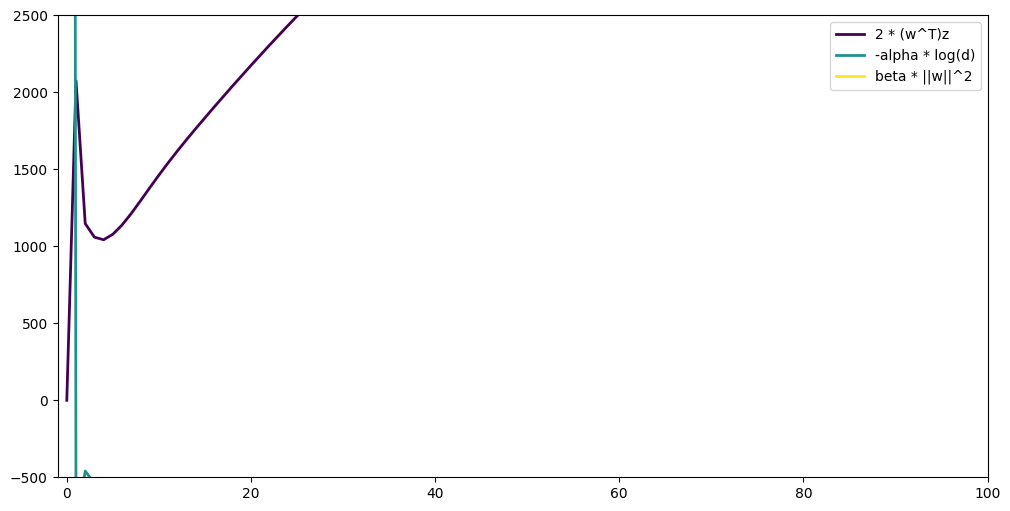

In [ ]:
# Display objective values
fig, ax = utils.plot_objectives(problem['objective'],
                                labels=['2 * (w^T)z',
                                        '-alpha * log(d)',
                                        'beta * ||w||^2'])
ax.set_xlim([-1, 100])
ax.set_ylim([-500, 2500])
plt.show()

In [ ]:
W_cornell, cornell = lg.log_degree_barrier(node_feat_cornell, adj_cornell, dist_type='sqeuclidean', alpha=1, beta=1, retall=True, verbosity='LOW')


Solution found after 95 iterations:
    objective function f(sol) = -3.540981e+02
    stopping criterion: RTOL


In [ ]:
W_thresh_cornell = np.max(adj_cornell) * W_cornell / np.max(W_cornell)
W_thresh_cornell[W_thresh_cornell < 0.1] = 0
h_idx = 1
W_new = adj_cornell*(1-h_idx) + W_thresh_cornell*(h_idx)

G_learned_cornell = nx.from_numpy_array(W_new)
pos = nx.spring_layout(G_gt_cornell)

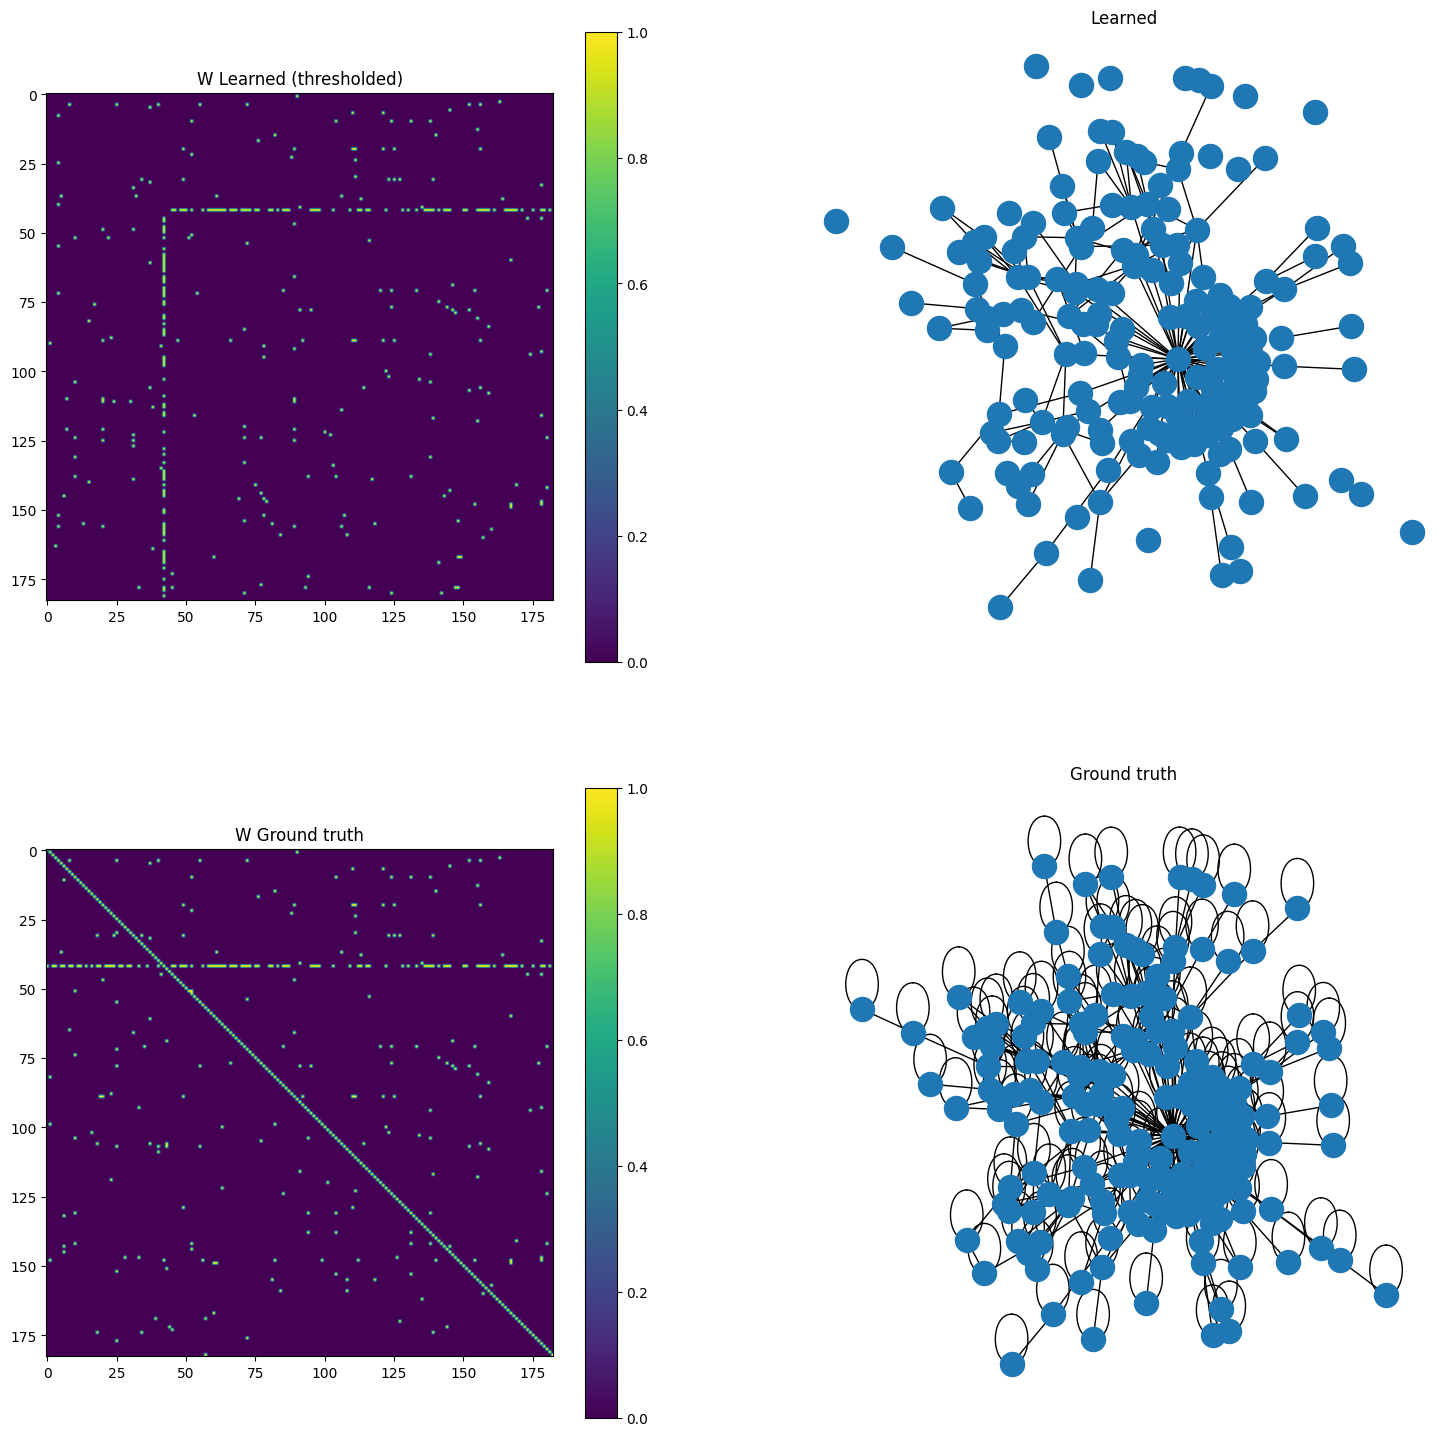

In [ ]:
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.imshow(W_thresh_cornell)
plt.colorbar()
plt.title('W Learned (thresholded)')

plt.subplot(2,2,2)
nx.draw(G_learned_cornell, pos=pos)
plt.title('Learned')

plt.subplot(2,2,3)
plt.imshow(adj_cornell)
plt.colorbar()
plt.title('W Ground truth')

plt.subplot(2,2,4)
nx.draw(G_gt_cornell, pos=pos)
plt.title('Ground truth')

plt.show()

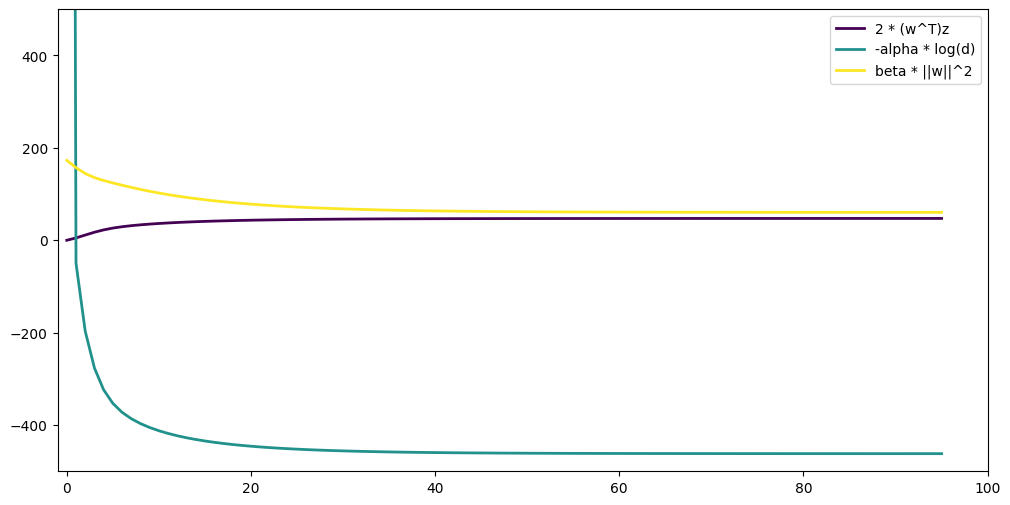

In [ ]:
# Display objective values
fig, ax = utils.plot_objectives(cornell['objective'],
                                labels=['2 * (w^T)z',
                                        '-alpha * log(d)',
                                        'beta * ||w||^2'])
ax.set_xlim([-1, 100])
ax.set_ylim([-500, 500])
plt.show()

In [ ]:
W_texas, texas = lg.log_degree_barrier(node_feat_texas, adj_texas, dist_type='sqeuclidean', alpha=1, beta=1, retall=True, verbosity='LOW')

Solution found after 95 iterations:
    objective function f(sol) = -3.535886e+02
    stopping criterion: RTOL


In [ ]:
W_thresh_texas = np.max(adj_texas) * W_texas / np.max(W_texas)
W_thresh_texas[W_thresh_texas < 0.1] = 0
h_idx = 1
W_new = adj_texas*(1-h_idx) + W_thresh_texas*(h_idx)
G_learned_texas = nx.from_numpy_array(W_new)
pos = nx.spring_layout(G_gt_texas)

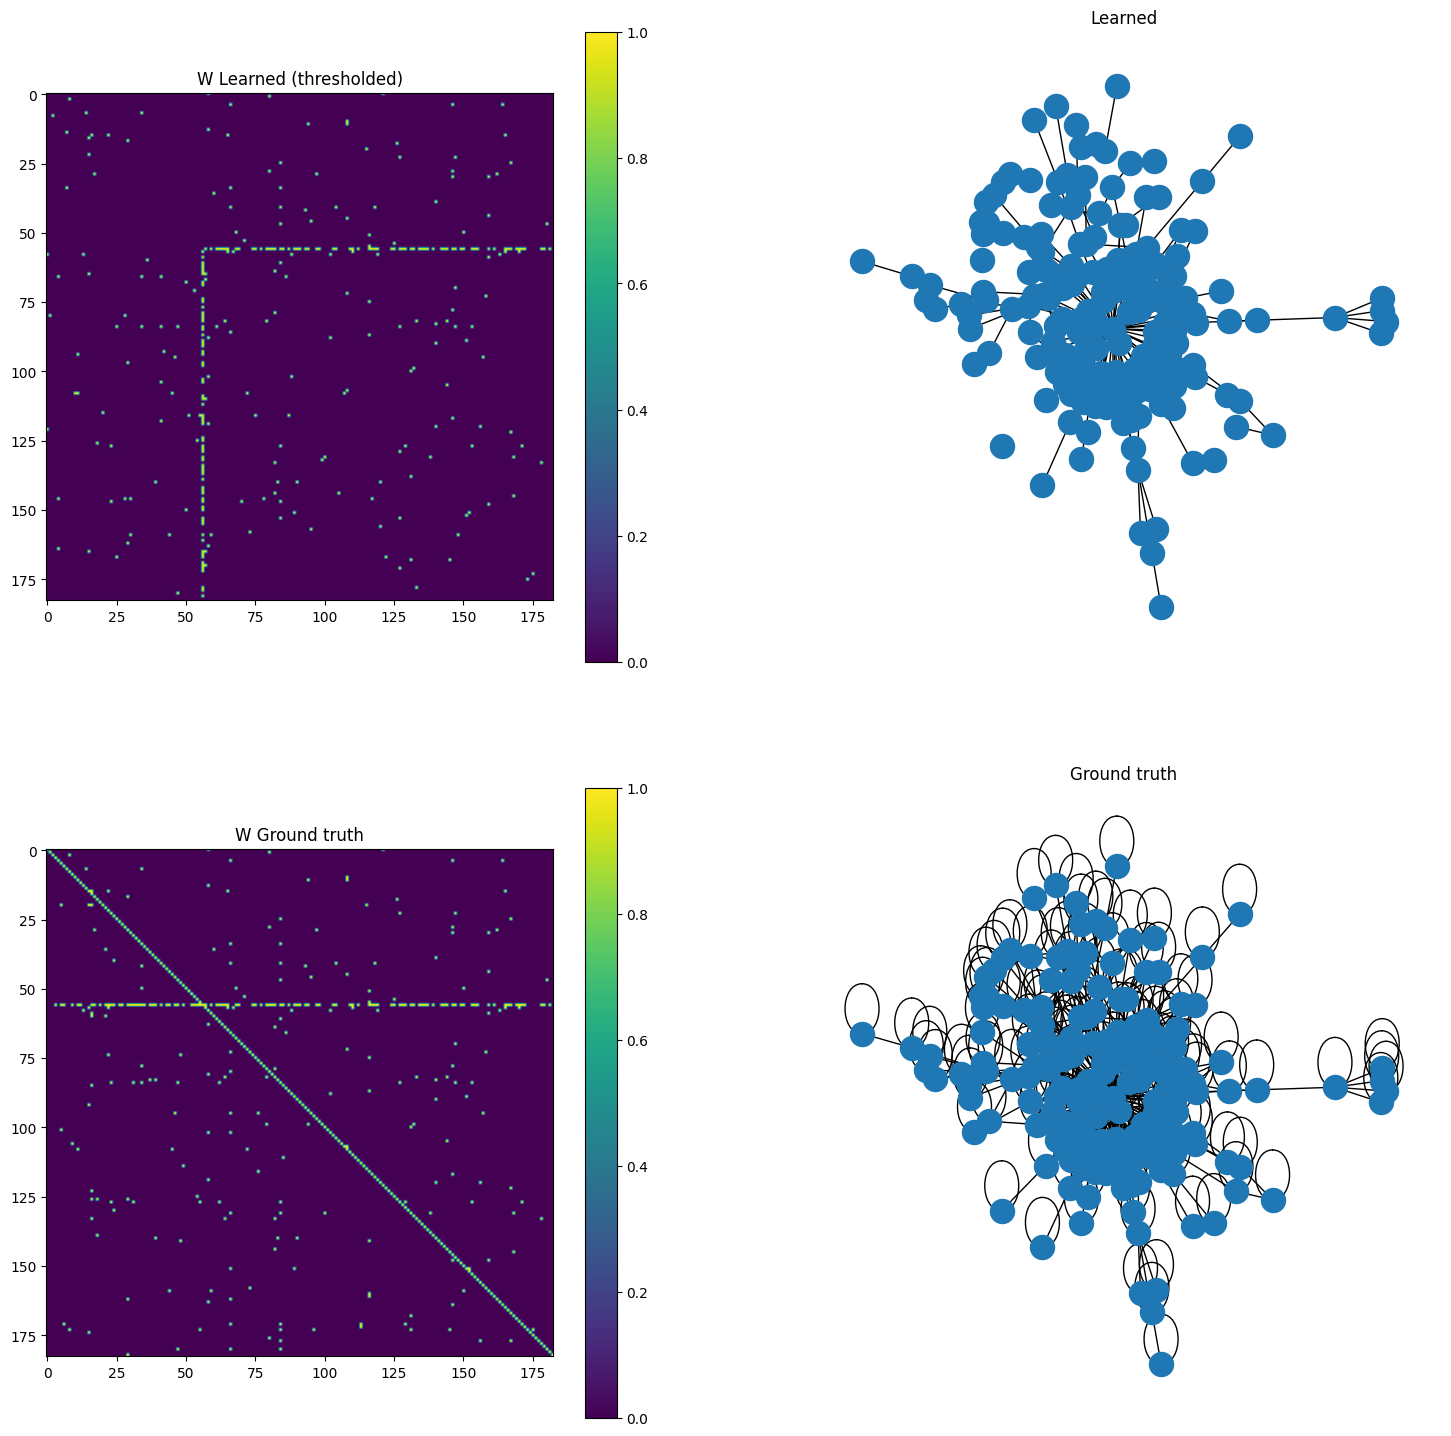

In [ ]:
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.imshow(W_thresh_texas)
plt.colorbar()
plt.title('W Learned (thresholded)')

plt.subplot(2,2,2)
nx.draw(G_learned_texas, pos=pos)
plt.title('Learned')

plt.subplot(2,2,3)
plt.imshow(adj_texas)
plt.colorbar()
plt.title('W Ground truth')

plt.subplot(2,2,4)
nx.draw(G_gt_texas, pos=pos)
plt.title('Ground truth')

plt.show()

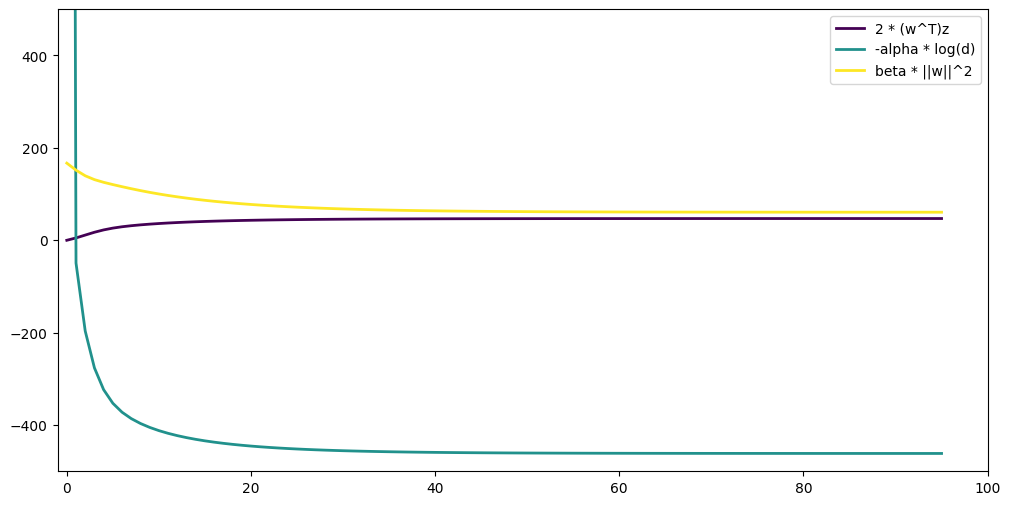

In [ ]:
# Display objective values
fig, ax = utils.plot_objectives(texas['objective'],
                                labels=['2 * (w^T)z',
                                        '-alpha * log(d)',
                                        'beta * ||w||^2'])
ax.set_xlim([-1, 100])
ax.set_ylim([-500, 500])
plt.show()

In [ ]:
# edge_list = nx.generate_edgelist(G_learned_texas, data=["weight"])
# print(list(edge_list))

def prepare_data(node_feat, G_learned, labels):
  N = G_learned.number_of_nodes()
  M = G_learned.number_of_edges()

  src = []
  dst = []
  edgeattr = []
  edge_list = list(nx.generate_edgelist(G_learned, data=["weight"]))
  for i in range(M):
    edge = list(map(float, edge_list[i].split(" ")))
    src.append(edge[0])
    dst.append(edge[1])
    edgeattr.append(edge[2])

    if edge[0] != edge[1]:
      src.append(edge[1])
      dst.append(edge[0])
      edgeattr.append(edge[2])

  edgeindex = torch.tensor([src, dst], dtype=torch.long)
  edgeattr = torch.tensor(edgeattr, dtype=torch.float)
  data = Data(x=node_feat, edge_index=edgeindex, edge_attr=edgeattr, y=labels)
  return data

data_chameleon = prepare_data(node_feat_cameleon, G_learned_chameleon, label_chameleon)
print(data_chameleon.is_directed())
print(data_chameleon.num_nodes)
print(data_chameleon.num_node_features)
print(data_chameleon.num_edges)


False
2277
2325
65511


In [ ]:
from sklearn.metrics import f1_score
def val(model,data):
    # data = data.pin_memory()
    # data = data.to('cuda:0', non_blocking=True)
    model.eval()
    pred = model(data.x, data.edge_index,data.edge_attr).argmax(dim=1)
    correct = sum(1 for a, b in zip(data.y[data.val_mask], pred[data.val_mask]) if a == b)
    # correct = [pred[data.val_mask] == data.y[data.val_mask]].sum()
    acc = int(correct) / int(data.val_mask.sum())
    return acc

def split(data, num_classes,split_percent):
    indices = []
    num_test = (int)(data.num_nodes * split_percent / num_classes)
    for i in range(num_classes):
      index = torch.tensor((data.y == i).nonzero()).reshape(-1)
      random_seed = 2
      torch.manual_seed(random_seed)
      index = index[torch.randperm(index.size(0))]
      indices.append(index)
    # print(indices)

    test_index = torch.cat([i[:num_test] for i in indices], dim=0)
    val_index = torch.cat([i[num_test:int(num_test*1.5)] for i in indices], dim=0)
    train_index = torch.cat([i[int(num_test*1.5):] for i in indices], dim=0)
    data.train_mask = torch_geometric.utils.index_to_mask(train_index, size=data.num_nodes)
    data.val_mask = torch_geometric.utils.index_to_mask(val_index, size=data.num_nodes)
    data.test_mask = torch_geometric.utils.index_to_mask(test_index, size=data.num_nodes)
    return data

In [ ]:
def train_on_original_dataset(data, num_classes, feature_size, hidden_units, learning_rate, decay, epochs):
  model = GCN_(feature_size, hidden_units, num_classes)
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=decay)
  # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  test_split_percent = 0.2
  data = split(data,num_classes,test_split_percent)
  if data.edge_attr == None:
    edge_weight = torch.ones(data.edge_index.size(1))
    data.edge_attr = edge_weight

  for epoch in range(epochs):
    # print(epoch)
    model.zero_grad()
    out = model(data.x, data.edge_index,data.edge_attr.float())
    pred = out.argmax(1)
    criterion = torch.nn.NLLLoss()
    # print(type(out[data.train_mask]))
    # print(type(data.y[data.train_mask]))
    loss = criterion(out[data.train_mask], torch.from_numpy(data.y[data.train_mask]).long())
    loss.backward()
    optimizer.step()
    best_val_acc = 0

    val_acc = val(model,data)
    if best_val_acc < val_acc:
        torch.save(model, 'full_best_model.pt')
        best_val_acc = val_acc

    # if epoch % 20 == 0:
    #     print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f})'.format(epoch, loss, val_acc, best_val_acc))

  model = torch.load('full_best_model.pt')
  model.eval()
  # data = data.pin_memory()
  # data = data.to('cuda:0', non_blocking=True)
  pred = model(data.x, data.edge_index,data.edge_attr).argmax(dim=1)
  correct = sum(1 for a, b in zip(data.y[data.test_mask], pred[data.test_mask]) if a == b)
  # correct = [pred[data.test_mask] == data.y[data.test_mask]]
  acc = int(correct) / int(data.test_mask.sum())

  print('--------------------------')
  train_correct = sum(1 for a, b in zip(data.y[data.train_mask], pred[data.train_mask]) if a == b)
  train_acc = int(train_correct) / int(data.train_mask.sum())
  print('Accuracy on test data {:.3f}'.format(acc*100))
  print("Micro F1 score: ", f1_score(data.y[data.test_mask], pred[data.test_mask], average="micro"))
  print("Macro F1 score: ", f1_score(data.y[data.test_mask], pred[data.test_mask], average="macro"))
  print('Accuracy on train data {:.3f}'.format(train_acc*100))

In [ ]:
train_on_original_dataset(data_chameleon, 5, 2325, 128, 0.01, 1e-3, 1000)

In epoch 0, loss: 1.610, val acc: 0.200 (best 0.200)
In epoch 20, loss: 1.403, val acc: 0.338 (best 0.338)
In epoch 40, loss: 1.287, val acc: 0.387 (best 0.387)
In epoch 60, loss: 1.251, val acc: 0.404 (best 0.404)
In epoch 80, loss: 1.204, val acc: 0.431 (best 0.431)
In epoch 100, loss: 1.162, val acc: 0.458 (best 0.458)
In epoch 120, loss: 1.125, val acc: 0.458 (best 0.458)
In epoch 140, loss: 1.103, val acc: 0.467 (best 0.467)
In epoch 160, loss: 1.079, val acc: 0.493 (best 0.493)
In epoch 180, loss: 1.072, val acc: 0.511 (best 0.511)
In epoch 200, loss: 1.066, val acc: 0.498 (best 0.498)
In epoch 220, loss: 1.047, val acc: 0.524 (best 0.524)
In epoch 240, loss: 1.064, val acc: 0.507 (best 0.507)
In epoch 260, loss: 1.033, val acc: 0.520 (best 0.520)
In epoch 280, loss: 1.056, val acc: 0.507 (best 0.507)
In epoch 300, loss: 1.023, val acc: 0.516 (best 0.516)
In epoch 320, loss: 1.039, val acc: 0.520 (best 0.520)
In epoch 340, loss: 1.017, val acc: 0.538 (best 0.538)
In epoch 360, lo

In [ ]:
data_chameleon_original = prepare_data(node_feat_cameleon, G_gt_chameleon, label_chameleon)
train_on_original_dataset(data_chameleon_original, 5, 2325, 128, 0.01, 1e-3, 1000)

In epoch 0, loss: 1.610, val acc: 0.200 (best 0.200)
In epoch 20, loss: 1.398, val acc: 0.338 (best 0.338)
In epoch 40, loss: 1.273, val acc: 0.391 (best 0.391)
In epoch 60, loss: 1.225, val acc: 0.404 (best 0.404)
In epoch 80, loss: 1.185, val acc: 0.453 (best 0.453)
In epoch 100, loss: 1.144, val acc: 0.453 (best 0.453)
In epoch 120, loss: 1.102, val acc: 0.489 (best 0.489)
In epoch 140, loss: 1.069, val acc: 0.498 (best 0.498)
In epoch 160, loss: 1.053, val acc: 0.520 (best 0.520)
In epoch 180, loss: 1.047, val acc: 0.493 (best 0.493)
In epoch 200, loss: 1.036, val acc: 0.502 (best 0.502)
In epoch 220, loss: 1.025, val acc: 0.493 (best 0.493)
In epoch 240, loss: 1.013, val acc: 0.502 (best 0.502)
In epoch 260, loss: 1.010, val acc: 0.529 (best 0.529)
In epoch 280, loss: 0.999, val acc: 0.556 (best 0.556)
In epoch 300, loss: 0.990, val acc: 0.493 (best 0.493)
In epoch 320, loss: 0.987, val acc: 0.529 (best 0.529)
In epoch 340, loss: 0.979, val acc: 0.542 (best 0.542)
In epoch 360, lo

In [ ]:
data_cornell = prepare_data(node_feat_cornell, G_learned_cornell, label_cornell)
print(data_cornell.is_directed())
print(data_cornell.num_nodes)
print(data_cornell.num_node_features)
print(data_cornell.num_edges)


False
183
1703
346


In [ ]:
train_on_original_dataset(data_cornell, 5, 1703, 128, 0.01, 1e-3, 1000)

In epoch 0, loss: 1.610, val acc: 0.250 (best 0.250)
In epoch 20, loss: 1.036, val acc: 0.250 (best 0.250)
In epoch 40, loss: 1.002, val acc: 0.250 (best 0.250)
In epoch 60, loss: 0.877, val acc: 0.333 (best 0.333)
In epoch 80, loss: 0.736, val acc: 0.417 (best 0.417)
In epoch 100, loss: 0.658, val acc: 0.417 (best 0.417)
In epoch 120, loss: 0.584, val acc: 0.583 (best 0.583)
In epoch 140, loss: 0.521, val acc: 0.500 (best 0.500)
In epoch 160, loss: 0.491, val acc: 0.500 (best 0.500)
In epoch 180, loss: 0.465, val acc: 0.500 (best 0.500)
In epoch 200, loss: 0.441, val acc: 0.500 (best 0.500)
In epoch 220, loss: 0.430, val acc: 0.500 (best 0.500)
In epoch 240, loss: 0.422, val acc: 0.500 (best 0.500)
In epoch 260, loss: 0.416, val acc: 0.500 (best 0.500)
In epoch 280, loss: 0.413, val acc: 0.500 (best 0.500)
In epoch 300, loss: 0.384, val acc: 0.583 (best 0.583)
In epoch 320, loss: 0.389, val acc: 0.583 (best 0.583)
In epoch 340, loss: 0.390, val acc: 0.500 (best 0.500)
In epoch 360, lo

In [ ]:
data_cornell_original = prepare_data(node_feat_cornell, G_gt_cornell, label_cornell)
train_on_original_dataset(data_cornell_original, 5, 1703, 128, 0.05, 1e-3, 1000)

In epoch 0, loss: 1.610, val acc: 0.250 (best 0.250)
In epoch 20, loss: 0.999, val acc: 0.250 (best 0.250)
In epoch 40, loss: 0.968, val acc: 0.250 (best 0.250)
In epoch 60, loss: 0.964, val acc: 0.250 (best 0.250)
In epoch 80, loss: 0.914, val acc: 0.250 (best 0.250)
In epoch 100, loss: 0.856, val acc: 0.333 (best 0.333)
In epoch 120, loss: 0.856, val acc: 0.250 (best 0.250)
In epoch 140, loss: 0.760, val acc: 0.250 (best 0.250)
In epoch 160, loss: 0.915, val acc: 0.250 (best 0.250)
In epoch 180, loss: 0.813, val acc: 0.250 (best 0.250)
In epoch 200, loss: 0.698, val acc: 0.250 (best 0.250)
In epoch 220, loss: 0.628, val acc: 0.333 (best 0.333)
In epoch 240, loss: 0.687, val acc: 0.333 (best 0.333)
In epoch 260, loss: 0.653, val acc: 0.333 (best 0.333)
In epoch 280, loss: 0.731, val acc: 0.417 (best 0.417)
In epoch 300, loss: 0.592, val acc: 0.333 (best 0.333)
In epoch 320, loss: 0.523, val acc: 0.333 (best 0.333)
In epoch 340, loss: 0.469, val acc: 0.333 (best 0.333)
In epoch 360, lo

In [ ]:
data_texas = prepare_data(node_feat_texas, G_learned_texas, label_texas)
print(data_texas.is_directed())
print(data_texas.num_nodes)
print(data_texas.num_node_features)
print(data_texas.num_edges)

False
183
1703
334


In [ ]:
train_on_original_dataset(data_texas, 5, 1703, 128, 0.01, 1e-3, 1000)

In epoch 0, loss: 1.610, val acc: 0.250 (best 0.250)
In epoch 20, loss: 1.054, val acc: 0.250 (best 0.250)
In epoch 40, loss: 0.901, val acc: 0.250 (best 0.250)
In epoch 60, loss: 0.623, val acc: 0.417 (best 0.417)
In epoch 80, loss: 0.513, val acc: 0.417 (best 0.417)
In epoch 100, loss: 0.456, val acc: 0.500 (best 0.500)
In epoch 120, loss: 0.413, val acc: 0.417 (best 0.417)
In epoch 140, loss: 0.385, val acc: 0.417 (best 0.417)
In epoch 160, loss: 0.373, val acc: 0.417 (best 0.417)
In epoch 180, loss: 0.367, val acc: 0.417 (best 0.417)
In epoch 200, loss: 0.349, val acc: 0.417 (best 0.417)
In epoch 220, loss: 0.344, val acc: 0.417 (best 0.417)
In epoch 240, loss: 0.345, val acc: 0.500 (best 0.500)
In epoch 260, loss: 0.336, val acc: 0.500 (best 0.500)
In epoch 280, loss: 0.323, val acc: 0.417 (best 0.417)
In epoch 300, loss: 0.323, val acc: 0.417 (best 0.417)
In epoch 320, loss: 0.318, val acc: 0.417 (best 0.417)
In epoch 340, loss: 0.316, val acc: 0.417 (best 0.417)
In epoch 360, lo

In [ ]:
data_texas_original = prepare_data(node_feat_texas, G_gt_texas, label_texas)
train_on_original_dataset(data_texas_original, 5, 1703, 128, 0.05, 1e-3, 1000)

In epoch 0, loss: 1.610, val acc: 0.250 (best 0.250)
In epoch 20, loss: 0.898, val acc: 0.500 (best 0.500)
In epoch 40, loss: 0.721, val acc: 0.417 (best 0.417)
In epoch 60, loss: 0.651, val acc: 0.417 (best 0.417)
In epoch 80, loss: 0.625, val acc: 0.417 (best 0.417)
In epoch 100, loss: 0.666, val acc: 0.417 (best 0.417)
In epoch 120, loss: 0.622, val acc: 0.417 (best 0.417)
In epoch 140, loss: 0.583, val acc: 0.417 (best 0.417)
In epoch 160, loss: 0.665, val acc: 0.500 (best 0.500)
In epoch 180, loss: 0.519, val acc: 0.417 (best 0.417)
In epoch 200, loss: 0.537, val acc: 0.417 (best 0.417)
In epoch 220, loss: 0.533, val acc: 0.417 (best 0.417)
In epoch 240, loss: 0.525, val acc: 0.667 (best 0.667)
In epoch 260, loss: 0.491, val acc: 0.417 (best 0.417)
In epoch 280, loss: 0.527, val acc: 0.417 (best 0.417)
In epoch 300, loss: 0.486, val acc: 0.500 (best 0.500)
In epoch 320, loss: 0.486, val acc: 0.417 (best 0.417)
In epoch 340, loss: 0.450, val acc: 0.417 (best 0.417)
In epoch 360, lo

In [ ]:
arr = np.arange(0.2,2.2,0.2)
print(arr)

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


In [ ]:
for alpha in arr:
  for beta in arr:
    print(alpha, beta)
    W_cornell, cornell = lg.log_degree_barrier(node_feat_cornell, adj_cornell, dist_type='sqeuclidean', alpha=alpha, beta=beta, retall=True, verbosity='LOW')
    W_thresh_cornell = np.max(adj_cornell) * W_cornell / np.max(W_cornell)
    W_thresh_cornell[W_thresh_cornell < 0.1] = 0
    h_idx = 1
    W_new = adj_cornell*(1-h_idx) + W_thresh_cornell*(h_idx)

    G_learned_cornell = nx.from_numpy_array(W_new)
    # pos = nx.spring_layout(G_gt_cornell)
    data_cornell = prepare_data(node_feat_cornell, G_learned_cornell, label_cornell)
    train_on_original_dataset(data_cornell, 5, 1703, 128, 0.01, 1e-3, 1000)
# print(data_cornell.is_directed())
# print(data_cornell.num_nodes)
# print(data_cornell.num_node_features)
# print(data_cornell.num_edges)



0.2 0.2
Solution found after 376 iterations:
    objective function f(sol) = -4.258258e+01
    stopping criterion: RTOL


<ipython-input-21-f869448c4c0d>:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  index = torch.tensor((data.y == i).nonzero()).reshape(-1)


--------------------------
Accuracy on test data 51.724
Micro F1 score:  0.5172413793103449
Macro F1 score:  0.4233766233766234
Accuracy on train data 89.437
0.2 0.4
Solution found after 232 iterations:
    objective function f(sol) = -3.885596e+01
    stopping criterion: RTOL
--------------------------
Accuracy on test data 51.724
Micro F1 score:  0.5172413793103449
Macro F1 score:  0.4241609371021135
Accuracy on train data 90.845
0.2 0.6000000000000001
Solution found after 174 iterations:
    objective function f(sol) = -3.633182e+01
    stopping criterion: RTOL
--------------------------
Accuracy on test data 51.724
Micro F1 score:  0.5172413793103449
Macro F1 score:  0.41904566022213074
Accuracy on train data 92.254
0.2 0.8
Solution found after 142 iterations:
    objective function f(sol) = -3.439971e+01
    stopping criterion: RTOL
--------------------------
Accuracy on test data 51.724
Micro F1 score:  0.5172413793103449
Macro F1 score:  0.4241609371021135
Accuracy on train data

In [ ]:
for alpha in arr:
  for beta in arr:
    print(alpha, beta)
    W_texas, texas = lg.log_degree_barrier(node_feat_texas, adj_texas, dist_type='sqeuclidean', alpha=alpha, beta=beta, retall=True, verbosity='LOW')
    # W_thresh_cornell = np.max(adj_cornell) * W_cornell / np.max(W_cornell)
    W_thresh_texas = np.max(adj_texas) * W_texas / np.max(W_texas)
    W_thresh_texas[W_thresh_texas < 0.1] = 0
    h_idx = 1
    W_new = adj_texas*(1-h_idx) + W_thresh_texas*(h_idx)
    G_learned_texas = nx.from_numpy_array(W_new)

    data_texas = prepare_data(node_feat_texas, G_learned_texas, label_texas)
    train_on_original_dataset(data_texas, 5, 1703, 128, 0.01, 1e-3, 1000)
# print(data_cornell.is_directed())
# print(data_cornell.num_nodes)
# print(data_cornell.num_node_features)
# print(data_cornell.num_edges)



0.2 0.2
Solution found after 374 iterations:
    objective function f(sol) = -4.256627e+01
    stopping criterion: RTOL
--------------------------
Accuracy on test data 31.034
Micro F1 score:  0.3103448275862069
Macro F1 score:  0.22333333333333333
Accuracy on train data 92.254
0.2 0.4
Solution found after 231 iterations:
    objective function f(sol) = -3.883106e+01
    stopping criterion: RTOL
--------------------------
Accuracy on test data 27.586
Micro F1 score:  0.27586206896551724
Macro F1 score:  0.17623188405797102
Accuracy on train data 93.662
0.2 0.6000000000000001
Solution found after 174 iterations:
    objective function f(sol) = -3.629740e+01
    stopping criterion: RTOL
--------------------------
Accuracy on test data 27.586
Micro F1 score:  0.27586206896551724
Macro F1 score:  0.19925925925925925
Accuracy on train data 94.366
0.2 0.8
Solution found after 142 iterations:
    objective function f(sol) = -3.435609e+01
    stopping criterion: RTOL
--------------------------